## Elower grid error

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#from exojax.spec.premodit import logf_bias

In [14]:
from exojax.utils.constants import hcperk, Tref
Tref=400

def beta(T):
    return (hcperk * (1. / T - 1. / Tref))


def f(E, T):
    return np.exp(-beta(T) * E)


def error_zeroth(T, Ttyp, dE):
        
    if Ttyp == Tref:
        x = - beta(T)*dE/2.0
        return 0.5*(np.exp(x) + np.exp(-x)) 
    else:
        alpha = beta(Ttyp)
        denom = np.exp(alpha*dE/2.0) - np.exp(-alpha*dE/2.0)
        num = (1.0 - np.exp(-alpha*dE/2.0))*np.exp(beta(T)*dE/2.0) - (1.0 - np.exp(alpha*dE/2.0))*np.exp(-beta(T)*dE/2.0)
        return num/denom

def error_first(T, Ttyp, dE):
    alpha = beta(Ttyp)
    facm = np.exp(alpha*dE/2.0) - np.exp(-alpha*dE/2.0)
    facp = 2.0 - (np.exp(alpha*dE/2.0) + np.exp(-alpha*dE/2.0))
    fac2 = np.exp(beta(T)*dE/2.0) - np.exp(-beta(T)*dE/2.0)
    
    return -dE/2.0*(alpha - beta(T))*fac2*facp/facm**2



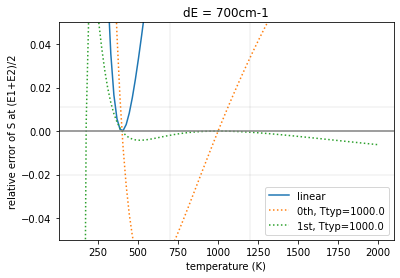

In [17]:
#plt.plot(Tarr,x(Tarr,100))
Ttyp1=1000.
Tarr = np.linspace(100,2000,100)
#Ttyp2=00.0
dE=700
El=100
plt.plot(Tarr, error_zeroth(Tarr, Tref, dE) - 1,label="linear")
plt.plot(Tarr, error_zeroth(Tarr, Ttyp1, dE) - 1,label="0th, Ttyp="+str(Ttyp1),ls="dotted")
plt.plot(Tarr, error_zeroth(Tarr, Ttyp1, dE) + error_first(Tarr, Ttyp1, dE) - 1,label="1st, Ttyp="+str(Ttyp1),ls="dotted")
#plt.plot(Tarr, dse(Tarr,Ttyp2, dE, El),label="weighted, Ttyp="+str(Ttyp2),ls="dotted")
plt.legend()
plt.ylim(-0.05,0.05)
plt.title("dE = "+str(dE)+"cm-1")
plt.axhline(0.0,color="gray")
plt.axvline(1200,color="gray",alpha=0.1)
plt.axhline(0.011,color="gray",alpha=0.1)
plt.axvline(700,color="gray",alpha=0.1)
plt.axhline(-0.02,color="gray",alpha=0.1)

#plt.axvline(296.,ymax=0.25,color="red",alpha=0.2)
plt.xlabel("temperature (K)")
plt.ylabel("relative error of S at (E1+E2)/2")
plt.savefig("analytic_est.png")

In [9]:
160*3

480